Marky Ha: ha108@purdue.edu
Priya Kataria: pkataria@purdue.edu

Part 1: Datset Collection

Dataset Link: https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020
              [main files: "circuits.csv", "drivers.csv", "races.csv", "results.csv"]
              https://www.formula1.com/en/results/2025/races

Why Formula 1? 
With hundreds of millions of fans worldwide, Formula One is one of the most followed sports.  We chose Formula One to analyze because it is an internationally followed, data-driven sport in which performance trends, driver consistency, team relations, and track-specific results are all based on observable variables. Variables such as drivers history, current standings, and experience would be sufficient to forecast the outcome of the forthcoming race. Our goal is to utlize these data and train them, allowing us to predict the tournament's champion. This project would help us understand how data is created throughout a race, not only in Formula One, but in other sports where statistical data is constantly being evaluated during the match to forecast the outcome. The dataset is reputable, well-structured, and widely used in analytics research, making it suitable for exploratory analysis, feature engineering, and machine learning.

We believe that F1 prediction involves an extensive amount of different variables that support one another.  As a result, selecting the Formula 1 (1950 - 2024) kaggle dataset, which has been confirmed to be recorded from previous races, in addition to webscraping F1 2025 season data, will allow us to provide more accurate data based on the drivers and their history based on a rich, multidimensional, and analytically meaningful record.  Its performance over the last 20 years has demonstrated its suitability for exploratory analysis, feature engineering, and predictive modeling.

Part 2

In [51]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb  
import time


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [52]:
#View Data
circuits = pd.read_csv("circuits.csv")

print("circuits")
print(circuits.shape)
print(circuits.info())
print(circuits.isna().sum(), "\n")

#Drop unecessary Column 
columns_to_drop = [
    "lat", "lng", "alt", "url"
]
#Predicting the outcome of the final races doesn't require us to use data such as latitude, longitude, or altitude to predict the outcome. 
#URL is just link to the dataset source, hence we cannot use it for our analysis

cols_existing = [col for col in columns_to_drop if col in circuits.columns]
circuits_cleaned = circuits.drop(columns=cols_existing)

circuits_cleaned.to_csv("circuits.csv", index=False) 
circuits_cleaned.head()

circuits
(77, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   circuitId   77 non-null     int64 
 1   circuitRef  77 non-null     object
 2   name        77 non-null     object
 3   location    77 non-null     object
 4   country     77 non-null     object
dtypes: int64(1), object(4)
memory usage: 3.1+ KB
None
circuitId     0
circuitRef    0
name          0
location      0
country       0
dtype: int64 



,circuitId,circuitRef,name,location,country
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain
4,5,istanbul,Istanbul Park,Istanbul,Turkey


In [53]:
#View Dtype races
races = pd.read_csv("races.csv")
print("races")
print(races.shape)
print(races.info())
print(races.isna().sum(), "\n")

#Drop unecessary Column 
columns_to_drop = [
    "fp1_date", "fp1_time", 
    "fp2_date", "fp2_time", 
    "fp3_date", "fp3_time",
    "quali_date", "quali_time", "sprint_date", "sprint_time",
    "url", "date", "time" 
]
#fp1_date, fp1_time, etc ....: Are just the time in which the event will start at 
#Date and time are just the date and time that the event will happen 
#URL is just link to the dataset source, hence we cannot use it for our analysis

cols_existing = [col for col in columns_to_drop if col in races.columns]

races_cleaned = races.drop(columns=cols_existing)

races_cleaned.to_csv("races.csv", index=False) #save it back to the original dataset, because it's blank or irrelavent

races_cleaned.head()


races
(1125, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raceId     1125 non-null   int64 
 1   year       1125 non-null   int64 
 2   round      1125 non-null   int64 
 3   circuitId  1125 non-null   int64 
 4   name       1125 non-null   object
dtypes: int64(4), object(1)
memory usage: 44.1+ KB
None
raceId       0
year         0
round        0
circuitId    0
name         0
dtype: int64 



,raceId,year,round,circuitId,name
0,1,2009,1,1,Australian Grand Prix
1,2,2009,2,2,Malaysian Grand Prix
2,3,2009,3,17,Chinese Grand Prix
3,4,2009,4,3,Bahrain Grand Prix
4,5,2009,5,4,Spanish Grand Prix


In [54]:
#View Dtype drivers
drivers = pd.read_csv("drivers.csv")
print("drivers")
print(drivers.shape)
print(drivers.info())
print(drivers.isna().sum(), "\n")

columns_to_drop = [
    "number", "dob", "url"  
]
#We dropped number because drivers number changes frequently depending on the season, so it is hard to track drivers based on their number
#We dropped dob (Day of Birth), because we will no need it for our analysis
#URL is just link to the dataset source, hence we cannot use it for our analysis

cols_existing = [col for col in columns_to_drop if col in drivers.columns]

drivers_cleaned = drivers.drop(columns=cols_existing)

drivers_cleaned.to_csv("drivers.csv", index=False)

drivers_cleaned.head()


drivers
(861, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     861 non-null    int64 
 1   driverRef    861 non-null    object
 2   code         861 non-null    object
 3   forename     861 non-null    object
 4   surname      861 non-null    object
 5   nationality  861 non-null    object
dtypes: int64(1), object(5)
memory usage: 40.5+ KB
None
driverId       0
driverRef      0
code           0
forename       0
surname        0
nationality    0
dtype: int64 



,driverId,driverRef,code,forename,surname,nationality
0,1,hamilton,HAM,Lewis,Hamilton,British
1,2,heidfeld,HEI,Nick,Heidfeld,German
2,3,rosberg,ROS,Nico,Rosberg,German
3,4,alonso,ALO,Fernando,Alonso,Spanish
4,5,kovalainen,KOV,Heikki,Kovalainen,Finnish


In [55]:
#View Dtype results
results = pd.read_csv("results.csv")
print("results")
print(results.shape)
print(results.info())
print(results.isna().sum(), "\n")

columns_to_drop = [
    "resultId", "number", "statusId" 
]
#resultId is not likely linked to the current season statistic, so we decided to refer to results based on the drivers first and last name
#We dropped number because drivers number changes frequently depending on the season, so it is hard to track drivers based on their number
#statusId is linked to another dictionary, if we were to use it, we would have to clean and do more analysis, which would not be convenient for the time given.
 
cols_existing = [col for col in columns_to_drop if col in results.columns]

results_cleaned = results.drop(columns=cols_existing)

results_cleaned.to_csv("results.csv", index=False)

results_cleaned.head()


results
(26759, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   raceId           26759 non-null  int64  
 1   driverId         26759 non-null  int64  
 2   constructorId    26759 non-null  int64  
 3   grid             26759 non-null  int64  
 4   position         26759 non-null  object 
 5   positionText     26759 non-null  object 
 6   positionOrder    26759 non-null  int64  
 7   points           26759 non-null  float64
 8   laps             26759 non-null  int64  
 9   time             26759 non-null  object 
 10  milliseconds     26759 non-null  object 
 11  fastestLap       26759 non-null  object 
 12  rank             26759 non-null  object 
 13  fastestLapTime   26759 non-null  object 
 14  fastestLapSpeed  26759 non-null  object 
dtypes: float64(1), int64(6), object(8)
memory usage: 3.1+ MB
None
raceId             0
d

,raceId,driverId,constructorId,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed
0,18,1,1,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300
1,18,2,2,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586
2,18,3,3,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719
3,18,4,4,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464
4,18,5,1,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385


This section focuses primarily on data cleaning.  We cleaned and standardized driver names, removed abbreviations, and ensured consistent formatting.  We removed a few columns to help us better visualize our workspace while also making it easier to decide which data to use and which not to use.  Using real data reduces our exposure to N/A because all of the necessary data is recorded.  We believe that this is a critical step because it prepares the data for modeling and reduces errors during feature engineering.

Part 3

In [56]:
#Merging/Identifying RacerId, RaceId, CircuitId and match it with result
drivers = pd.read_csv("drivers.csv")
circuits = pd.read_csv("circuits.csv")
races = pd.read_csv("races.csv")
results = pd.read_csv("results.csv")

#Merge results with drivers
merged = results.merge(drivers, on="driverId", how="left")

#Merge with races
merged = merged.merge(races, on="raceId", how="left")

#Merge with circuits
merged = merged.merge(circuits, on="circuitId", how="left")

#Select useful columns
final = merged[[
    "raceId", "year", "round", "name_x", "forename", "surname", 
    "constructorId", "grid", "positionOrder", "points", 
    "name_y", "location", "country"
]]

# Rename for clarity
final = final.rename(columns={
    "name_x": "RaceName",
    "name_y": "CircuitName"
})

final.to_csv("merged_results.csv", index=False)

print("Merged dataset saved as merged_results.csv")

print(final.head(20))

Merged dataset saved as merged_results.csv
    raceId  year  round               RaceName   forename     surname  \
0       18  2008      1  Australian Grand Prix      Lewis    Hamilton   
1       18  2008      1  Australian Grand Prix       Nick    Heidfeld   
2       18  2008      1  Australian Grand Prix       Nico     Rosberg   
3       18  2008      1  Australian Grand Prix   Fernando      Alonso   
4       18  2008      1  Australian Grand Prix     Heikki  Kovalainen   
5       18  2008      1  Australian Grand Prix     Kazuki    Nakajima   
6       18  2008      1  Australian Grand Prix  Sébastien    Bourdais   
7       18  2008      1  Australian Grand Prix       Kimi   Räikkönen   
8       18  2008      1  Australian Grand Prix     Robert      Kubica   
9       18  2008      1  Australian Grand Prix       Timo       Glock   
10      18  2008      1  Australian Grand Prix     Takuma        Sato   
11      18  2008      1  Australian Grand Prix     Nelson  Piquet Jr.   
12      

In [57]:
#Split first and last name 
df = pd.read_csv("2025driverlist.csv")

#Split driver into first/surname
df["forename"] = df["DRIVER"].apply(lambda x: x.split()[0])
df["surname"] = df["DRIVER"].apply(lambda x: " ".join(x.split()[1:]))

#Remove Driver Column --> Show only first/last name 
df = df.drop(columns=["DRIVER"])


df.to_csv("2025driverlist_cleaned.csv", index=False)

In [58]:
#Filter History to only show driver who are currently driving 

merged = pd.read_csv("merged_results.csv")
drivers = pd.read_csv("2025driverlist_cleaned.csv")

merged.columns, drivers.columns

merged["forename"] = merged["forename"].astype(str).str.strip().str.lower()
merged["surname"] = merged["surname"].astype(str).str.strip().str.lower()

drivers["forename"] = drivers["forename"].astype(str).str.strip().str.lower()
drivers["surname"] = drivers["surname"].astype(str).str.strip().str.lower()

#Filtering matching driver's forename/surname

filtered = merged.merge(
    drivers[["forename", "surname"]],
    on=["forename", "surname"],
    how="inner"
)

output_path = "merged_results_2025drivers_only.csv"
filtered.to_csv(output_path, index=False)

filtered.head(), output_path

(   raceId  year  round               RaceName  forename   surname  \
 0      18  2008      1  Australian Grand Prix     lewis  hamilton   
 1      18  2008      1  Australian Grand Prix  fernando    alonso   
 2      19  2008      2   Malaysian Grand Prix     lewis  hamilton   
 3      19  2008      2   Malaysian Grand Prix  fernando    alonso   
 4      20  2008      3     Bahrain Grand Prix  fernando    alonso   
 
    constructorId  grid  positionOrder  points                     CircuitName  \
 0              1     1              1    10.0  Albert Park Grand Prix Circuit   
 1              4    11              4     5.0  Albert Park Grand Prix Circuit   
 2              1     9              5     4.0    Sepang International Circuit   
 3              4     7              8     1.0    Sepang International Circuit   
 4              4    10             10     0.0   Bahrain International Circuit   
 
        location    country  
 0     Melbourne  Australia  
 1     Melbourne  Austra

In [59]:
#Filter to Abu Dhabi Only
filtered = pd.read_csv("merged_results_2025drivers_only.csv")

yas_only = filtered[ 
    filtered["CircuitName"].astype(str).str.contains("yas marina", case=False)
]

cols_to_drop = ["raceId", "round", "country", "location"]
existing = [c for c in cols_to_drop if c in yas_only.columns]
yas_only = yas_only.drop(columns=existing)

yas_only = yas_only.sort_values(by="year", ascending=True)

yas_only.to_csv("merged_results_2025drivers_yas_only.csv", index=False)

yas_only.head(), yas_only["CircuitName"].unique()


(     year              RaceName  forename   surname  constructorId  grid  \
 190  2009  Abu Dhabi Grand Prix  fernando    alonso              4    15   
 191  2009  Abu Dhabi Grand Prix     lewis  hamilton              1     1   
 228  2010  Abu Dhabi Grand Prix     lewis  hamilton              1     2   
 229  2010  Abu Dhabi Grand Prix  fernando    alonso              6     3   
 264  2011  Abu Dhabi Grand Prix     lewis  hamilton              1     2   
 
      positionOrder  points         CircuitName  
 190             14     0.0  Yas Marina Circuit  
 191             19     0.0  Yas Marina Circuit  
 228              2    18.0  Yas Marina Circuit  
 229              7     6.0  Yas Marina Circuit  
 264              1    25.0  Yas Marina Circuit  ,
 array(['Yas Marina Circuit'], dtype=object))

In [60]:
#List of race files (Race 1-23)
race_files = [f"race{i}result.csv" for i in range(1, 24)]

# print files and their corresponding race numbers
sprint_race = {
    "sprint1result.csv": 5,   # China
    "sprint2result.csv": 6,   # Miami
    "sprint3result.csv": 14,  # Belgium
    "sprint4result.csv": 19,  # USA (Austin)
    "sprint5result.csv": 21,  # Brazil
    "sprint6result.csv": 23   # Qatar
}

#Combine all files
files = race_files + list(sprint_race.keys())

all_races = []

for file in files:
    try:
        df = pd.read_csv(file)

        #Assign race number
        if file in sprint_race:
            df["RACE"] = sprint_race[file]
            df["TYPE"] = "Sprint"
        else:
            #Extract race number from filename
            race_num = int(file.replace("race", "").replace("result.csv", ""))
            df["RACE"] = race_num
            df["TYPE"] = "Race"

        #Ensure numeric columns
        df["LAPS"] = pd.to_numeric(df["LAPS"], errors="coerce")
        df["PTS."] = pd.to_numeric(df["PTS."], errors="coerce")

        all_races.append(df)

    except FileNotFoundError:
        print(f"File not found: {file}")
    except Exception as e:
        print(f"Error processing {file}: {e}")

#Merge all into one DataFrame
season_df = pd.concat(all_races, ignore_index=True)

#Clean numeric columns
season_df["PTS."] = season_df["PTS."].fillna(0).astype(int)
season_df["LAPS"] = season_df["LAPS"].fillna(0).astype(int)

# Save merged season file
season_df.to_csv("F12025_season.csv", index=False)



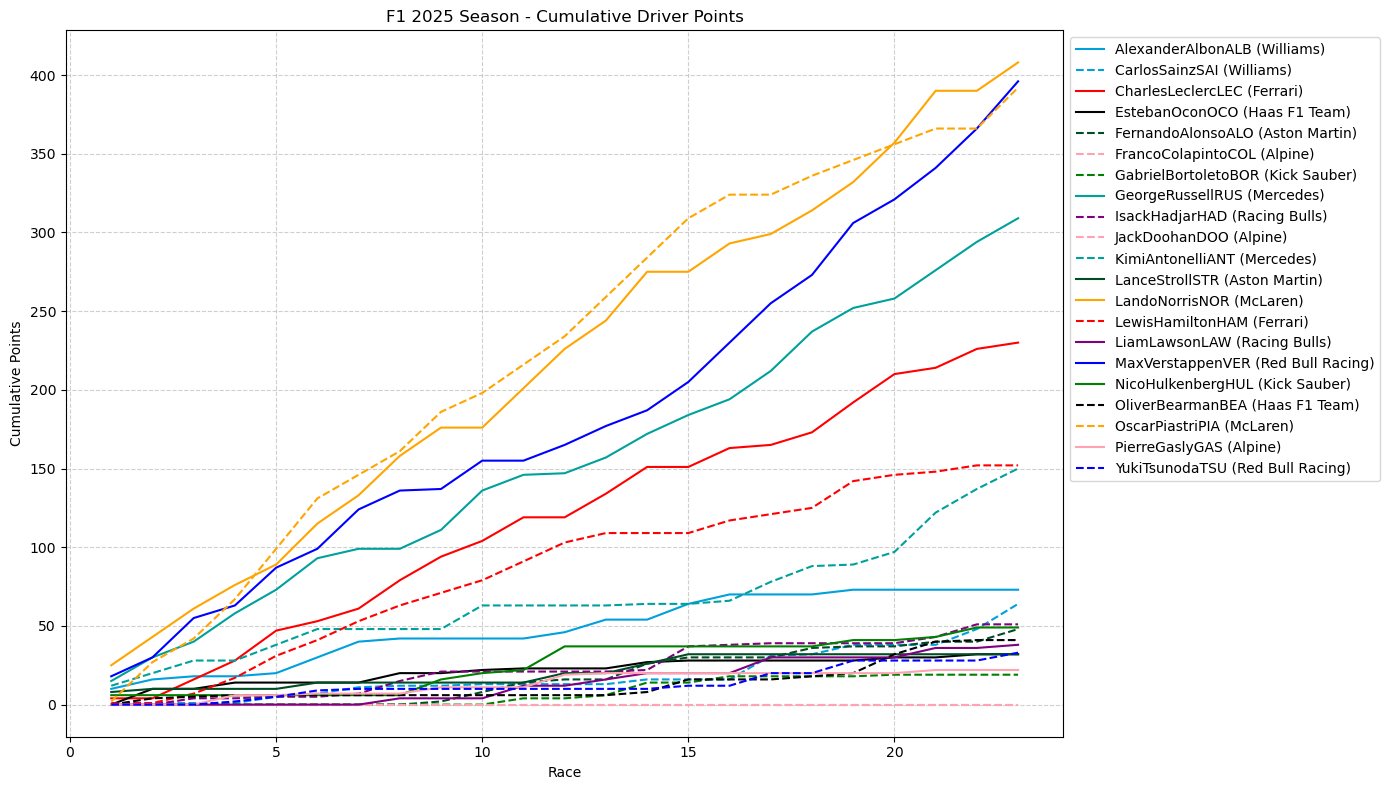

Part 3 complete.


In [61]:
#Graph out the current season 
season_df = pd.read_csv("F12025_season.csv")


season_df["PTS."] = pd.to_numeric(season_df["PTS."], errors="coerce").fillna(0).astype(int)

race_order = season_df["RACE"].unique()
race_index_map = {race: i+1 for i, race in enumerate(race_order)}
season_df["RACE"] = season_df["RACE"].map(race_index_map)


points_per_race = season_df.groupby(["RACE", "DRIVER"])["PTS."].sum().reset_index()
points_matrix = points_per_race.pivot(index="RACE", columns="DRIVER", values="PTS.").fillna(0)
cumulative_points = points_matrix.cumsum()

team_colors = {
    "McLaren":"Orange",        
    "Red Bull Racing": "Blue",
    "Mercedes": "#00A19B",       
    "Ferrari": "Red",        
    "Williams": "#00A0DD",       
    "Aston Martin": "#004d24",   
    "Alpine": "#FFA3B3",         
    "Kick Sauber": "Green",    
    "Racing Bulls": "Purple"    
}

driver_team_map = season_df.set_index("DRIVER")["TEAM"].to_dict()

#Plot out line graph for the whole season
plt.figure(figsize=(14,8))

for driver in cumulative_points.columns:
    team = driver_team_map[driver]
    color = team_colors.get(team, "black")
    
   
    teammates = [d for d, t in driver_team_map.items() if t == team]
    linestyle = "-" if driver == teammates[0] else "--" #This is used to diffrientiate 2 different drivers from the same team
    
    plt.plot(cumulative_points.index, cumulative_points[driver],
             label=f"{driver} ({team})", color=color, linestyle=linestyle)

plt.title("F1 2025 Season - Cumulative Driver Points")
plt.xlabel("Race")
plt.ylabel("Cumulative Points")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

print("Part 3 complete.")


As feature enginnering focused on capturing meaningful performance indicators for each driver, we had generated a merged career statistic in such allowed us to be able to analyse and interpret more about their performance for the upcoming race. We decided to merge historical data with current data, in which it shows us which driver has experience for the race track in Abu Dhabi and who does not. Different race types were introduced because a Formula One season is built up of different race types to allow drivers to gain a point advantage while practicing on the track. The visualization at the end depicts the current 2025 Formula 1 season, as the rapid increase in Max Verstappen points and his potential to win the championship increases with each race was the primary reason for us to work on this project, predicting whether Max Verstappen would be able to win the championship against the two leaderboards.

Part 4

In [62]:
#Load the 2025 season dataset and historical driver results
season_df = pd.read_csv("F12025_season.csv")
history_df = pd.read_csv("merged_results_2025drivers_only.csv")

#Clean driver names
season_df["DRIVER"] = season_df["DRIVER"].str.replace(r"[A-Z]{3}$", "", regex=True)
season_df["DRIVER"] = season_df["DRIVER"].str.replace(r"([a-z])([A-Z])", r"\1 \2", regex=True)
season_df["forename"] = season_df["DRIVER"].str.split().str[0].str.lower()
season_df["surname"] = season_df["DRIVER"].str.split().str[1].str.lower()

#Clean history name columns
history_df["forename"] = season_df["DRIVER"].str.split().str[0].str.lower()
history_df["surname"] = season_df["DRIVER"].str.split().str[1].str.lower()

#Create career-level statistical features
career_features = history_df.groupby(["forename", "surname"]).agg({
    "points":["mean", "sum"],
    "positionOrder":"mean",
    "grid":"mean"
}).reset_index()
career_features.columns = [
    "forename", "surname", 
    "career_avg_points", "career_total_points",
    "career_avg_finish", "career_avg_grid"
]

#Merge history with 2025 season data
season_df = season_df.merge(
    career_features,
    on=["forename","surname"],
    how="left"
)

season_df["prev_race_points"] = season_df.groupby("DRIVER")["PTS."].shift(1).fillna(0)

#Feature Selection for modeling
categorical_features = ["TEAM", "TYPE"]
numerical_features = [
    "LAPS",
    "prev_race_points",
    "career_avg_points",
    "career_avg_finish",
    "career_avg_grid"
]

#Build the preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

#Prepare target variables
season_df["POS."] = pd.to_numeric(season_df["POS."], errors="coerce")
X = season_df[numerical_features + categorical_features]
y_reg = season_df["PTS."]
y_clf = (season_df["POS."] <= 3).astype(int)

print("Part 4 complete.")

Part 4 complete.


We used a ColumnTransformer to build a preprocessing pipeline that used StandardScaler for numerical features and OneHotEncoder for categorical ones after selecting numerical and categorical features for modeling. We created separate target variables for regression (points prediction) and classification (top-3 finish) after converting the race target columns to numeric types. We then created the feature matrix and target vectors needed for model training.

Part 5

In [63]:
#Split the dataset for regression task
X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

#Split the dataset for classification task
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_clf, test_size=0.2, random_state=42
)

#Build a pipeline for Linear Regression with preprocessing 
lr_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

#Build a pipeline for Random Forest Regression with preprocessing
rf_reg_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

#Build a pipeline for logistic Regression with preprocessing
log_reg_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

#Build a pipeline with for Random Forest Classification with preprocessing
rf_clf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(random_state=42))
])

#Train teh regression models using the regression target variable
lr_pipeline.fit(X_train, y_train_reg)
rf_reg_pipeline.fit(X_train, y_train_reg)

#Train the classification models using the classification target variable
log_reg_pipeline.fit(X_train, y_train_reg)
rf_clf_pipeline.fit(X_train, y_train_reg)

print("Part 5 complete.")

Part 5 complete.


We used pipelines to train four machine learning models: Random Forest Classification, Logistic Regression, Random Forest Regression, and Linear Regression. To ensure that scaling and encoding were applied consistently throughout training, each model included a preprocessing pipeline. We split the data into subsets for testing and training, then used the training data to fit the models. This allowed us to compare classification and regression methods for forecasting driver performance.

Part 6

LR RMSE: 4.885868480158993
RF RMSE: 4.92474407320736
LR R2: 0.3760278545875301
RF R2: 0.3660587808064012
Logistic Accuracy: 0.7672413793103449
RF Accuracy: 0.5517241379310345


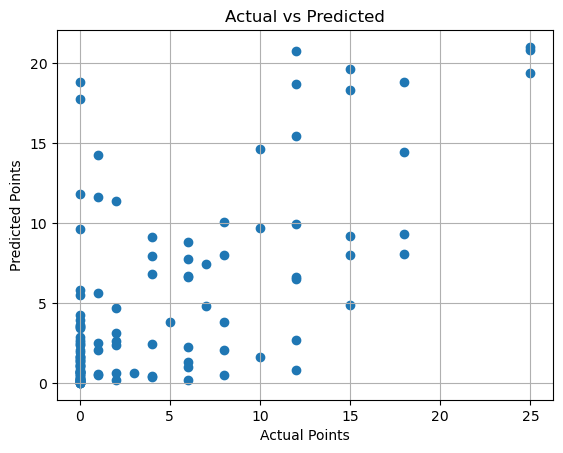

Part 6 complete.


In [64]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, precision_score

#Generate regression predictions using Linear Regression and Random Forest models
lr_pred = lr_pipeline.predict(X_test)
rf_pred = rf_reg_pipeline.predict(X_test)

#Compute Root Mean Squared Error for each regression model
lr_rmse = np.sqrt(mean_squared_error(y_test_reg, lr_pred))
rf_rmse = np.sqrt(mean_squared_error(y_test_reg, rf_pred))

#Compute R-squared values for each regression model
lr_r2 = r2_score(y_test_reg, lr_pred)
rf_r2 = r2_score(y_test_reg, rf_pred)


#Print regression performance results
print("LR RMSE:", lr_rmse)
print("RF RMSE:", rf_rmse)
print("LR R2:", lr_r2)
print("RF R2:", rf_r2)

#Generate classification predictions using Logistic Regression and Random Forest classifier
log_pred = log_reg_pipeline.predict(X_test)
rf_clf_pred = rf_clf_pipeline.predict(X_test)

#Compute and print classification accuracy for each model
print("Logistic Accuracy:", accuracy_score(y_test_clf, log_pred))
print("RF Accuracy:", accuracy_score(y_test_clf, rf_clf_pred))

#Create a scatter plot comparing actual vs predicted values for the Random Forest regressor 
plt.figure()
plt.scatter(y_test_reg, rf_pred)
plt.xlabel("Actual Points")
plt.ylabel("Predicted Points")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

print("Part 6 complete.")

We made predictions for both regression models and calculated RMSE and R2 to evaluate their performance. We computed accuracy scores for classification models. In addition, we generated a scatter plot for the Random Forest Regressor that contrasted actual and predicted points. Using these metrics, we compared the performance of different algorithms on the same dataset and determined which method produced the most accurate predictions.

Part 7

In [65]:
from sklearn.model_selection import GridSearchCV

#Define the hyperparameter grid to test different Random Forest setting
param_grid = {
    "model__n_estimators":[100, 200],
    "model__max_depth":[5, 10, None]
}

#Create a GridSearchCV to wrap around full pipeline
grid = GridSearchCV(
    Pipeline([
        ("preprocessor", preprocessor),
        ("model", RandomForestRegressor(random_state=42))
    ]),
    param_grid,
    cv=3,
    scoring="neg_root_mean_squared_error"
)

#Train the grid search on the training data
grid.fit(X_train, y_train_reg)

#Retrieve the best-performing model from the grid serach
best_rf = grid.best_estimator_

#Generate predictions on the tets data using the tuned model
best_pred = best_rf.predict(X_test)

#Compute evaluation metrics for the tuned model
tuned_rmse = np.sqrt(mean_squared_error(y_test_reg, best_pred))
tuned_r2 = r2_score(y_test_reg, best_pred)

#Display model performance results
print("Tuned RMSE:", tuned_rmse)
print("Tuned R2:", tuned_r2)
print("Best params:", grid.best_params_)


print("Part 7 complete.")

Tuned RMSE: 4.837454784453025
Tuned R2: 0.388332372963725
Best params: {'model__max_depth': 5, 'model__n_estimators': 100}
Part 7 complete.


To fine-tune the Random Forest Regressor, we tested various n_estimators and max_depth values with GridSearchCV. We used cross-validation to test every possible parameter combination and wrapped the entire pipeline (preprocessing + model) within the grid search. We used grid.best_estimator_ to retrieve the best-performing model after training, and we retested it on the test set to determine its tuned RMSE and R2. This allowed me to quantify the gains from hyperparameter tuning by comparing the performance of the adjusted model to that of the original.

Decision Tree

Filtered drivers:
  forename     surname  PTS.
0    Lando      norris   408
1      Max  verstappen   396
2    Oscar     piastri   392
Decision Tree Accuracy: 0.985


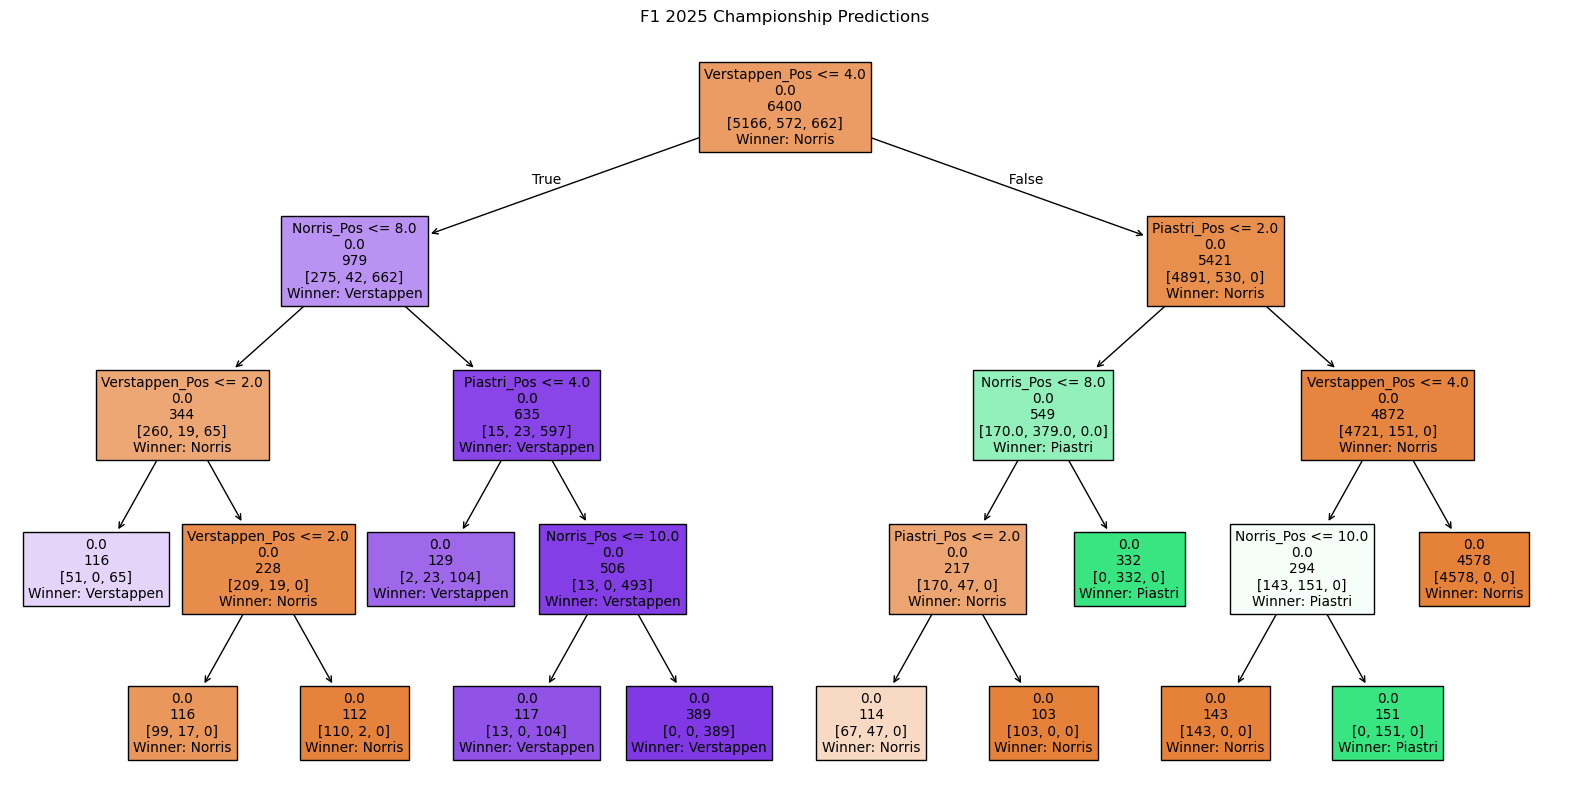

In [102]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

standings = pd.read_csv("2025driverlist_cleaned.csv")
standings["surname"] = standings["surname"].astype(str).str.lower().str.strip()

#Filter top 3 contenders
top3 = standings[standings["surname"].isin(["norris", "verstappen", "piastri"])]
print("Filtered drivers:")
print(top3[["forename", "surname", "PTS."]])

#Extract current championship points
n_start = top3[top3["surname"]=="norris"]["PTS."].values[0]
v_start = top3[top3["surname"]=="verstappen"]["PTS."].values[0]
p_start = top3[top3["surname"]=="piastri"]["PTS."].values[0]

points_map = {1:25, 2:18, 3:15, 4:12, 5:10, 6:8, 7:6, 8:4, 9:2, 10:1}

def get_pts(pos):
    return points_map.get(pos,0)

#Generate all possible race outcomes
rows = []

for n in range(1,21):
    for v in range(1,21):
        for p in range(1,21):
            nf = n_start + get_pts(n)
            vf = v_start + get_pts(v)
            pf = p_start + get_pts(p)

            if nf > vf and nf > pf:
                champ = "Norris"
            elif vf > nf and vf > pf:
                champ = "Verstappen"
            else:
                champ = "Piastri"

            rows.append([n,v,p,champ])

df_tree = pd.DataFrame(rows, columns=[
    "Norris_Pos", "Verstappen_Pos", "Piastri_Pos", "Champion"
])

# Force all position columns to be integers
df_tree[["Norris_Pos", "Verstappen_Pos", "Piastri_Pos"]] = (
    df_tree[["Norris_Pos", "Verstappen_Pos", "Piastri_Pos"]].astype(int)
)


#Train Decision Tree Model
X = df_tree[["Norris_Pos", "Verstappen_Pos", "Piastri_Pos"]].astype(int)
y = df_tree["Champion"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, random_state=42)
dt.fit(X_train, y_train)

print("Decision Tree Accuracy:", dt.score(X_test, y_test))

#Visualise Decision Tree
plt.figure(figsize=(20,10))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=[f"Winner: {c}" for c in dt.classes_],
    filled=True,
    label='none',
    precision=0
)
plt.title("F1 2025 Championship Predictions")
plt.show()

In [99]:
#Load Race 23 results
race23 = pd.read_csv("race23result.csv")

#Clean driver names
race23["DRIVER"] = race23["DRIVER"].astype(str).str.replace(r"[A-Z]{3}$", "", regex=True)
race23["DRIVER"] = race23["DRIVER"].str.replace(r"([a-z])([A-Z])", r"\1 \2", regex=True)
race23["forename"] = race23["DRIVER"].str.split().str[0].str.lower()
race23["surname"] = race23["DRIVER"].str.split().str[-1].str.lower()

#Filter numeric columns
race23["PTS."] = pd.to_numeric(race23["PTS."], errors="coerce").fillna(0)
race23["LAPS"] = pd.to_numeric(race23["LAPS"], errors="coerce").fillna(0)

#Load and prepare historical data
hist = pd.read_csv("merged_results_2025drivers_only.csv")
hist["forename"] = hist["forename"].astype(str).str.strip().str.lower()
hist["surname"] = hist["surname"].astype(str).str.strip().str.lower()
hist["points"] = pd.to_numeric(hist["points"], errors="coerce").fillna(0)
hist["positionOrder"] = pd.to_numeric(hist["positionOrder"], errors="coerce")

career = hist.groupby(["forename", "surname"]).agg(
    career_avg_points = ("points", "mean"),
    career_avg_finish = ("positionOrder", "mean")
).reset_index()

#Merge historical data into race23
race23 = race23.merge(career, on=["forename", "surname"], how="left")
race23["prev_race_points"] = race23["PTS."]
race23["TYPE"] = "Race"
race23["career_avg_grid"] = 0

#Features used by the trained model
categorical_features = ["TEAM", "TYPE"]
numerical_features = [
    "LAPS",
    "prev_race_points",
    "career_avg_points",
    "career_avg_finish",
    "career_avg_grid"
]
race23[numerical_features] = race23[numerical_features].fillna(0)

#Build feature matrix
X_race24 = race23[numerical_features + categorical_features]

#Use the trained model
try:
    model_to_use = best_rf
    print("Using tuned Random Forest model.")
except:
    model_to_use = rf_reg_pipeline
    print("Using Random Forest pipeline.")

#Predict driver strength
race23["Predicted_Score"] = model_to_use.predict(X_race24)

#Rank drivers
race23 = race23.sort_values(by="Predicted_Score", ascending=False).reset_index(drop=True)
race23["POS."] = race23.index + 1

#Assign F1 race points
points_map = {1:25, 2:18, 3:15, 4:12, 5:10, 6:8, 7:6, 8:4, 9:2, 10:1}
race23["PTS."] = race23["POS."].map(points_map).fillna(0).astype(int)

#Final output table
final_output = race23[["POS.", "NO.", "DRIVER", "TEAM", "PTS."]]

#Print results
print("\nRACE 24 FINISHING ORDER:\n")
print(final_output.to_string(index=False))


Using tuned Random Forest model.

RACE 24 FINISHING ORDER:

 POS.  NO.            DRIVER            TEAM  PTS.
    1   81     Oscar Piastri         McLaren    25
    2    1    Max Verstappen Red Bull Racing    18
    3    4      Lando Norris         McLaren    15
    4   55      Carlos Sainz        Williams    12
    5   12    Kimi Antonelli        Mercedes    10
    6   63    George Russell        Mercedes     8
    7   22      Yuki Tsunoda Red Bull Racing     6
    8   44    Lewis Hamilton         Ferrari     4
    9   16   Charles Leclerc         Ferrari     2
   10   23   Alexander Albon        Williams     1
   11   30       Liam Lawson    Racing Bulls     0
   12   43  Franco Colapinto          Alpine     0
   13   31      Esteban Ocon    Haas F1 Team     0
   14   10      Pierre Gasly          Alpine     0
   15   18      Lance Stroll    Aston Martin     0
   16    5 Gabriel Bortoleto     Kick Sauber     0
   17    6      Isack Hadjar    Racing Bulls     0
   18   14   Fernando 

In [103]:
df_tree = pd.DataFrame(rows, columns=[
    "Norris_Pos", "Verstappen_Pos", "Piastri_Pos", "Champion"
])

#figure out who wins the Grand Prix in each scenario
def race_winner(n, v, p):
    best = min(n, v, p)
    if n == best and v != best and p != best:
        return "Norris"
    elif v == best and n != best and p != best:
        return "Verstappen"
    elif p == best and n != best and v != best:
        return "Piastri"
    else:
        return "Other Drivers"  

df_tree["Race_Winner"] = df_tree.apply(
    lambda row: race_winner(row["Norris_Pos"], row["Verstappen_Pos"], row["Piastri_Pos"]),
    axis=1
)

#Percentages for race winner and world champion
race_probs = df_tree["Race_Winner"].value_counts(normalize=True) * 100
champ_probs = df_tree["Champion"].value_counts(normalize=True) * 100

print("Estimated % of scenarios where each driver wins the grand prix:")
print(race_probs.round(2), "\n")

print("Estimated % of scenarios where each driver wins the 2025 Formula 1 Championship:")
print(champ_probs.round(2), "\n")


Estimated % of scenarios where each driver wins the grand prix:
Race_Winner
Norris           30.88
Verstappen       30.88
Piastri          30.88
Other Drivers     7.38
Name: proportion, dtype: float64 

Estimated % of scenarios where each driver wins the 2025 Formula 1 Championship:
Champion
Norris        81.21
Verstappen    10.19
Piastri        8.60
Name: proportion, dtype: float64 



In addition to predicting the final championship outcome, we expanded our analysis to include the probability and percentage likelihood of each driver winning the 2025 title. To accomplish this, we generated every plausible combination of Norris, Verstappen, and Piastri's finishing positions and determined the winner in each case. As a result, we were able to generate a large simulation dataset that included every possible race outcome. Following that, we trained a decision tree classifier on these scenarios, which not only predicted the winner but also allowed us to extract class probabilities from the model's probability outputs. We can better understand how frequently each driver would win under different race conditions thanks to these probabilities, which show the percentage of simulated outcomes in which each driver wins the championship.